In [1]:
# libabries for data exploration.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helpful_functions import MLFunctions

# time series specific libararies
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.offsetbox import AnchoredText
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In [2]:
# load sales data.
sales = pd.read_csv("../../../Data/future_sales/sales_train.csv",
                    usecols=['date', 'shop_id', 'item_id', 'item_price', 'item_cnt_day'],
                    index_col='date')

In [5]:
sales.index = pd.to_datetime(sales.index, format="%d.%m.%Y")
sales = sales.sort_index()

In [7]:
helper_function = MLFunctions(sales)
arr = helper_function.dateNum()
sales['time'] = arr

In [8]:
sales.head()

,shop_id,item_id,item_price,item_cnt_day,time
date,,,,,
2013-01-01,18,5823,2500.0,1.0,0
2013-01-01,27,5573,849.0,1.0,0
2013-01-01,7,1006,399.0,1.0,0
2013-01-01,19,17707,899.0,1.0,0
2013-01-01,14,19548,149.0,1.0,0


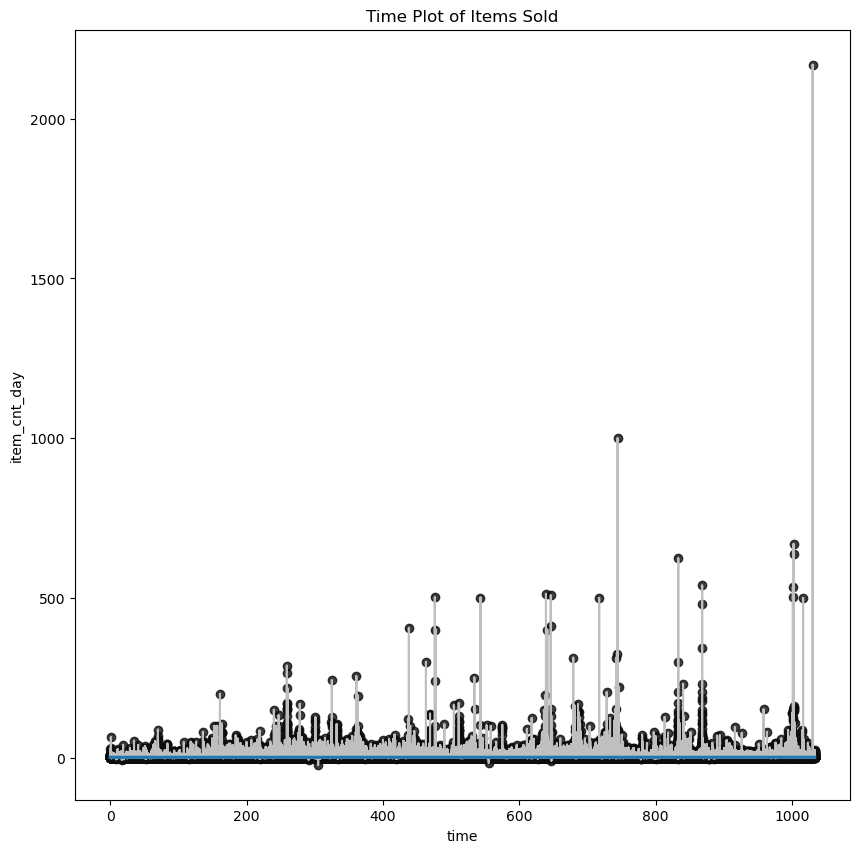

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot('time', 'item_cnt_day', data=sales, color='0.75')
ax = sns.regplot(x='time', y='item_cnt_day', data=sales, ci=None, scatter_kws=dict(color='0.05'))
ax.set_title('Time Plot of Items Sold');